In [1]:
from pathlib import Path
import shutil
src_folder = Path("dcm_official")
from utils import remove_white_theshold

2025-08-22 14:03:14.865279: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-22 14:03:14.874689: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755842594.884991  433661 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755842594.888002  433661 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755842594.896446  433661 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
file = Path('dcm_official/圆形/HC-123.dcm')

In [3]:
img = remove_white_theshold(file)[0]

In [4]:
split = img.max() // 3

In [ ]:
import numpy as np

red_channel_mask = np.where(img <= split, 1, 0)
red_channel = ((img * red_channel_mask / split) * 255).astype(np.uint8)
green_channel_mask = np.where((split < img) & (img <= 2 * split), 1, 0)
green_channel = (img * green_channel_mask - split) / split * 255
green_channel = np.where(green_channel >=0, green_channel, 0).astype(np.uint8)
blue_channel = np.where(img > 2 * split, img, 0)
blue_channel = (img * blue_channel - 2 * split) / split * 255
blue_channel = np.where(blue_channel >=0, blue_channel, 0).astype(np.uint8)

In [8]:
red_channel.min(), red_channel.max(), green_channel.min(), green_channel.max(), blue_channel.min(), blue_channel.max()

(np.uint8(0),
 np.uint8(254),
 np.uint8(0),
 np.uint8(254),
 np.uint8(0),
 np.uint8(255))

In [9]:
channels = [red_channel, blue_channel, green_channel]

In [10]:
from itertools import permutations
perms = list(permutations(channels, 3))

In [11]:
len(perms)

6

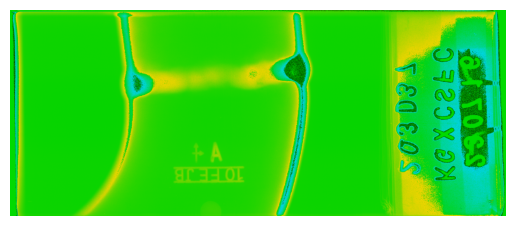

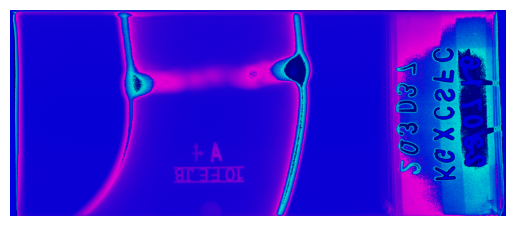

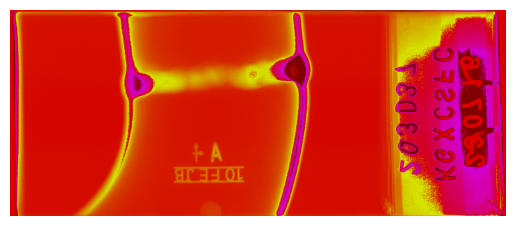

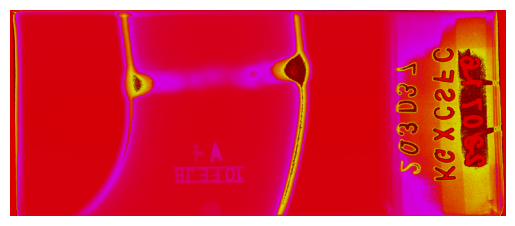

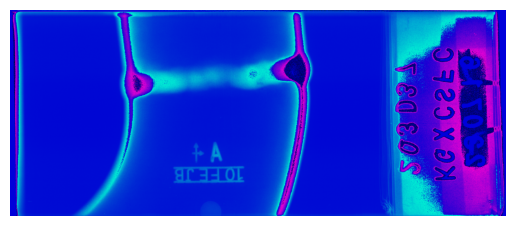

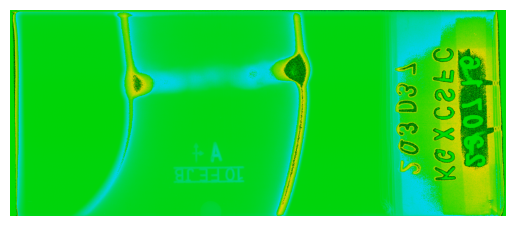

In [12]:
import matplotlib.pyplot as plt
for channel1, channel2, channel3 in perms:
    img = np.stack([channel1, channel2, channel3]).transpose((1, 2, 0))
    plt.axis("off")
    plt.imshow(img)
    plt.show()

In [ ]:
1367 - 1365

1365.0

In [ ]:
(1364 / 1364) * 255